In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import streamlit as st
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'streamlit'

In [9]:
#Data Acquisition
df = pd.read_csv('/content/student-por.csv')

print (df.columns)

#Data Cleaning

# 1 Check for Missing Values
c = avg = 1
for ele in df:
  if str(ele).isnumeric():
    c += 1
    avg += ele
  avg /= c
# Replace missing values
df = df.replace(to_replace="NaN", value=avg)


# 2 Remove Duplicates
non_duplicate = df[~df.duplicated(df.columns)]
print (non_duplicate)


Index(['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3'], dtype='object')
    school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0    GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1    GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2    GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other

Correlation Matrix:
                                                    Student Age       Sex  \
Student Age                                            1.000000  0.138233   
Sex                                                    0.138233  1.000000   
Graduated high-school type                             0.294426  0.126218   
Scholarship type                                      -0.316506 -0.206876   
Additional work                                       -0.181019  0.190476   
Regular artistic or sports activity                    0.138233  0.224138   
Do you have a partner                                  0.042572 -0.125471   
Total salary if available                              0.127853 -0.022154   
Transportation to the university                       0.001472 -0.013313   
Accommodation type in Cyprus                          -0.199257 -0.154957   
Mother’s education                                    -0.068972  0.062370   
Father’s education                                    -0

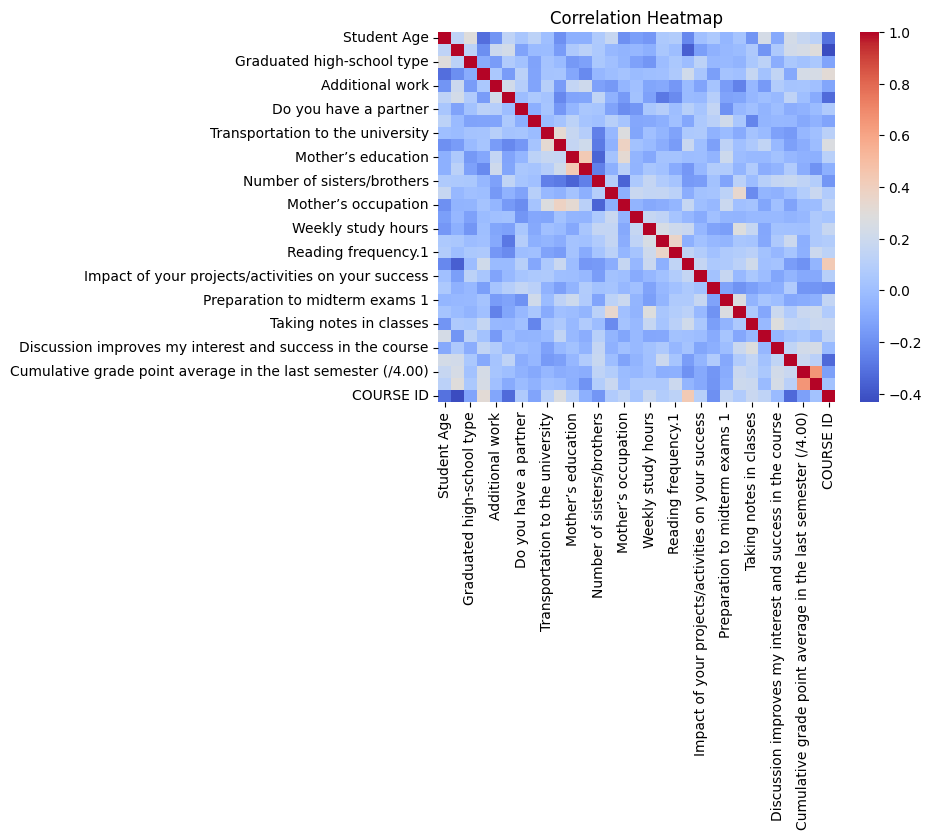

In [ ]:
X_features = []

XTrain = df[X_features]
yTrain = df['GRADE']


correlation_matrix = df[X_features].corr()

print("Correlation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XTrain, yTrain, test_size=0.2, random_state=100)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train RMSE: 1.4826307709490387
Test RMSE: 1.9957643370143645
